# Final Project: Classification

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Load the data
file_path = "/home/ridwan/ML-LAB/bank-subscription/bank-data/bank-data/bank-full.csv"
df = pd.read_csv(file_path, sep=';')  # Assuming the data is separated by ';', change it if necessary

# The entire DataFrame 'df' is used as the training set
train = df.copy()


Checking the columns of each dataset

In [3]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
# test.columns

Hence, 'Subscribed' is the target variable.

Checking the data types of the variables

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# test.info()

Checking the shapes of each dataset

In [7]:
train.shape

(45211, 17)

In [8]:
# test.shape

Hence, we can see that we have 17 similar features in the both the dataset and 'Subscribed' is the variable that is to be predicted

## Data Exploration

In [9]:
#Printing the first 5 rows of the train dataset
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
#Printing the first 5 rows of the test dataset
# test.head()

In [11]:
#checking for missing values in train dataset
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
#Checking for missing values in test dataset
# test.isnull().sum()

### Univariate Analysis

#### Analysis of 'Subscribed' variable

In [13]:
#Frequency of 'subscribed'
train['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

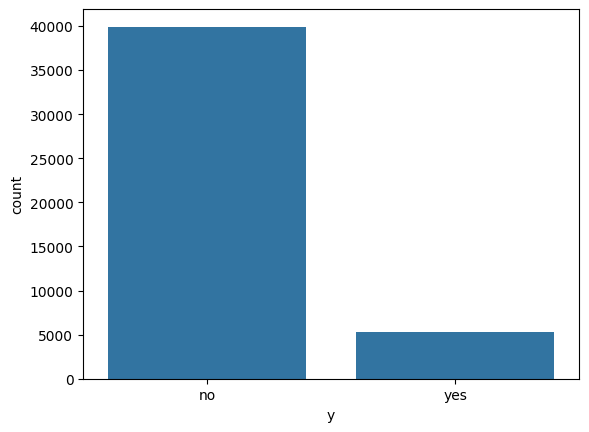

In [14]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x=train['y'])

In [15]:
#Normalizing the frequency table of 'Subscribed' variable
train['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

From the above analysis we can see that only 5,289 people out of 45211 have subscribed which is roughly 11.7%. 

#### Analysing th 'Job' variable

In [16]:
#Frequency table
train['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

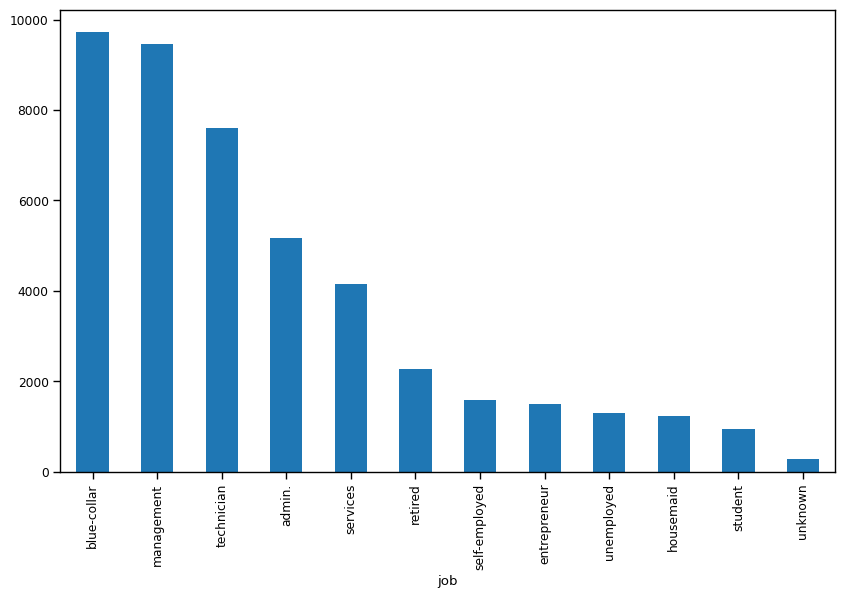

In [17]:
# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

#### Analysis of 'marital' status

In [18]:
train['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

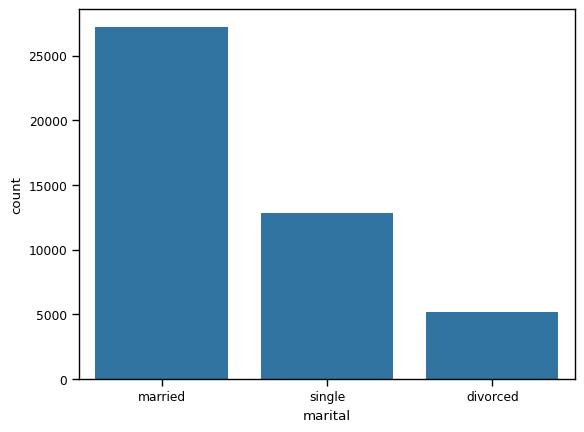

In [19]:
sns.countplot(data=train, x='marital');

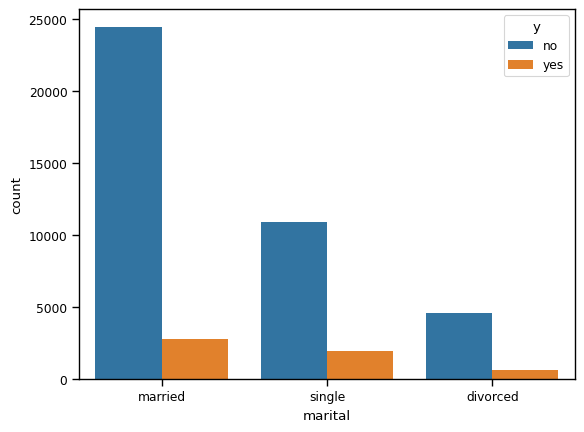

In [20]:
sns.countplot(data=train, x='marital', hue=train['y']);

### Analyzing the 'age' variable

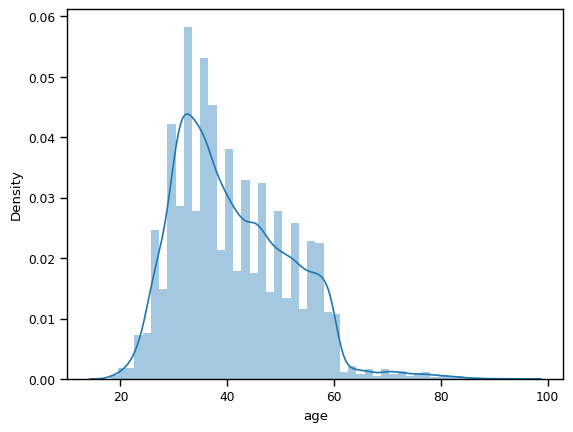

In [21]:
sns.distplot(train['age']);

We can infer that most of the clients fall in the age group between 20-60.

## Bivariate Analysis

In [22]:
#job vs subscribed
print(pd.crosstab(train['job'],train['y']))

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


In [23]:
job = pd.crosstab(train['job'],train['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)


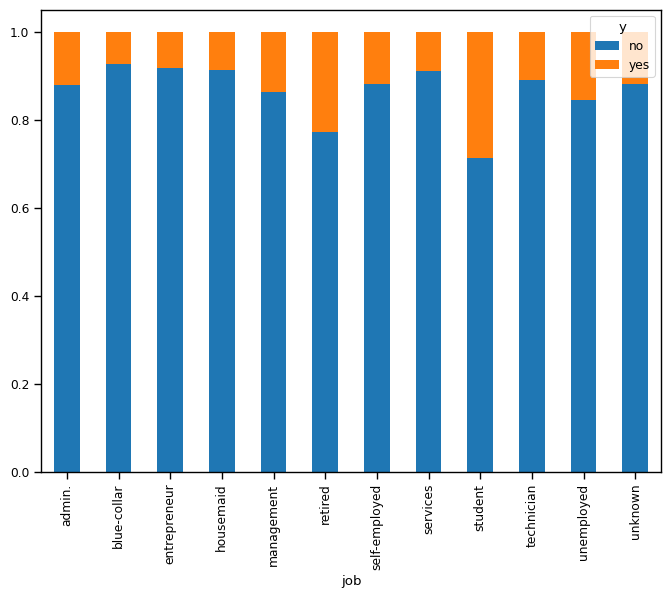

In [24]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [25]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['y'])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [26]:
marital = pd.crosstab(train['marital'], train['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

y,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


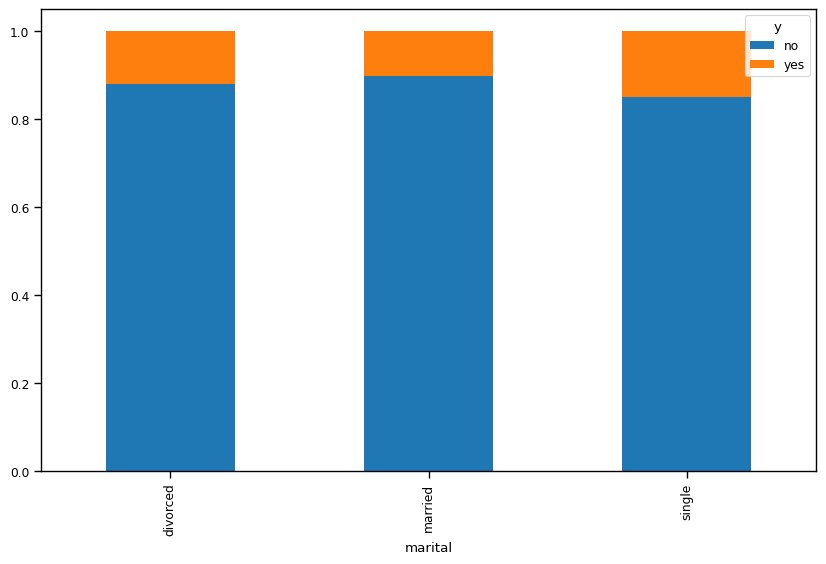

In [27]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [28]:
#default vs subscription
pd.crosstab(train['default'], train['y'])

y,no,yes
default,,
no,39159,5237
yes,763,52


In [29]:
dflt = pd.crosstab(train['default'], train['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


<Axes: xlabel='default'>

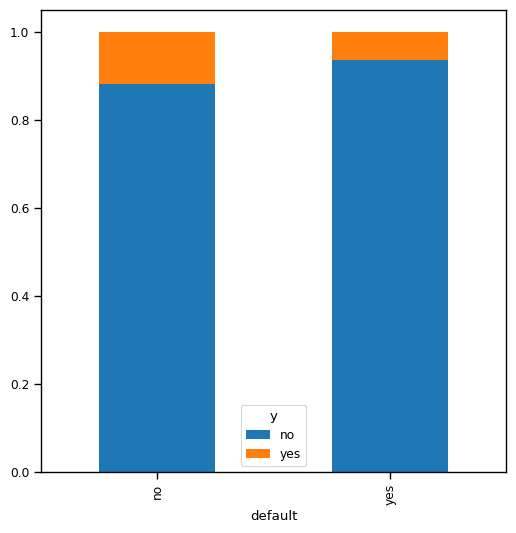

In [30]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [31]:
# Converting the target variables into 0s and 1s
train['y'].replace('no', 0,inplace=True)
train['y'].replace('yes', 1,inplace=True)

In [32]:
train['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [33]:
#Correlation matrix
categorical_columns = train.select_dtypes(include=['object']).columns
train = pd.get_dummies(train, columns=categorical_columns, drop_first=True)
tc = train.corr()
tc

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,-0.044002,0.021792,...,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838,-0.048757,0.009642,...,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.008466,0.035240,-0.030271
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,-0.022898,-0.002312,...,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.032952,-0.030321,0.086256
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521,0.009637,-0.001327,...,0.016163,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,0.008986,0.002128,...,0.104148,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621,0.020063,-0.014203,...,-0.136274,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.389791,0.228539,-0.869962
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236,-0.017095,-0.008181,...,-0.082943,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.306615,0.201424,-0.532763
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000,-0.072083,-0.019662,...,-0.034382,-0.016805,0.129456,-0.102500,-0.014937,0.128531,0.123185,0.031955,0.306788,-0.167051
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.072083,1.000000,-0.096585,...,-0.013203,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.001342,-0.053074,0.022194
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.019662,-0.096585,1.000000,...,0.025949,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,-0.013506,-0.019111,0.014901


<Axes: >

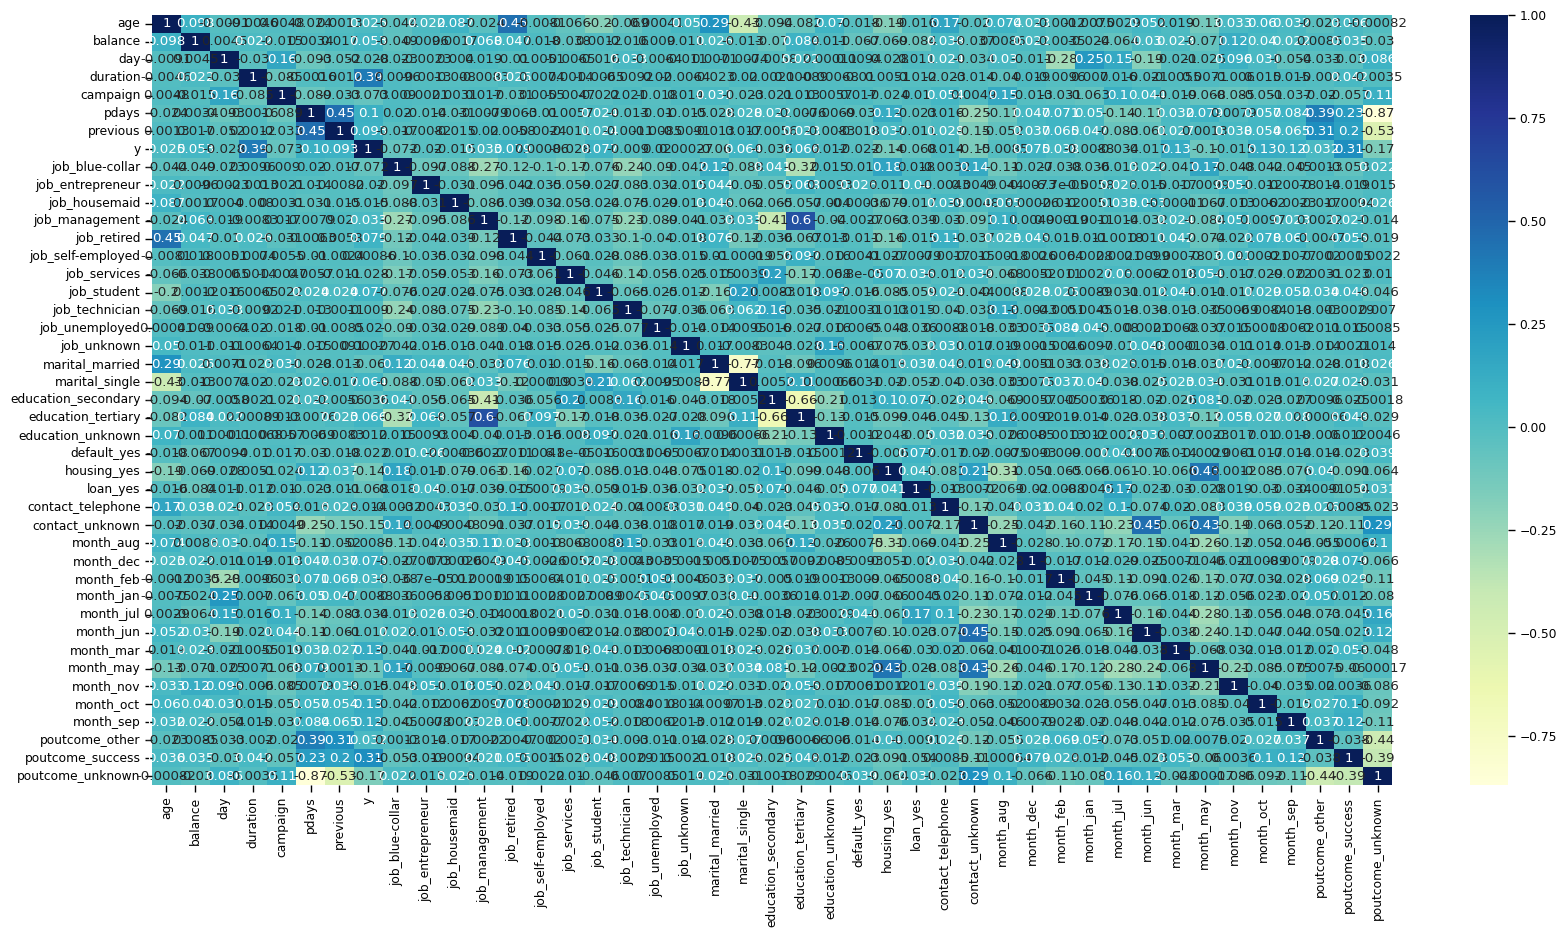

In [34]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

## Model Building

In [35]:
target = train['y']
train = train.drop('y', axis=1)

In [36]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


Splitting the data into train and validation set such as to validate the results of our model on the validation set.
keeping 20% of the dataset as our validation set and the rest as our training set.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

Now our data is ready and it's time to build our model and check its performance. Since it's a classification problem, I'll be using Logistic Regression model for this problem.

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [41]:
#fitting the data into the model
lreg.fit(X_train,y_train)

LogisticRegression()

In [42]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

Checking the accuracy of our model

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.8924029636182683

We got an accuracy score of around 89% on the validation dataset. 

We got an accuracy of more than 89% on the validation set. 

Let's now make the prediction on test dataset

Finally, we will save these predictions into a csv file. 

In [46]:
submissions = pd.DataFrame()

In [47]:
# submissions['ID'] = test['ID']
submissions['subscribed'] = pred

In [48]:
submissions['subscribed']

0       0
1       0
2       0
3       0
4       0
       ..
9038    0
9039    0
9040    0
9041    0
9042    0
Name: subscribed, Length: 9043, dtype: int64

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [49]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [50]:
submissions['subscribed']

0       no
1       no
2       no
3       no
4       no
        ..
9038    no
9039    no
9040    no
9041    no
9042    no
Name: subscribed, Length: 9043, dtype: object

In [51]:
submissions.to_csv('submission file.csv', header=True, index=False)